# Introduction

**Ethereum** is a blockchain platform with its own cryptocurrency, called **Ether** (ETH) or Ethereum, and its own programming language, called Solidity.

As a blockchain network, Ethereum is a **decentralized** public ledger for verifying and recording transactions. The network's users can create, publish, monetize, and use **applications** on the platform, and use its Ether cryptocurrency as payment. Insiders call the decentralized applications on the network "dapps."

As a cryptocurrency, Ethereum is second in market value only to Bitcoin, as of May 2021.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mpl_dates
from yahoo_fin.stock_info import *

In [2]:
df = get_data('ETH-USD', start_date='2015-08-07')

In [3]:
df = df.drop(columns=['ticker','adjclose'])

In [4]:
df

,open,high,low,close,volume
2015-08-06,2.831620,3.536610,2.521120,2.772120,1.643290e+05
2015-08-07,2.793760,2.798810,0.714725,0.753325,6.741880e+05
2015-08-08,0.706136,0.879810,0.629191,0.701897,5.321700e+05
2015-08-09,0.713989,0.729854,0.636546,0.708448,4.052830e+05
2015-08-10,0.708087,1.131410,0.663235,1.067860,1.463100e+06
...,...,...,...,...,...
2021-09-07,3428.378174,3559.121338,3224.764893,3497.315186,3.173843e+10
2021-09-08,3452.548340,3562.992676,3400.517090,3427.340088,2.411806e+10
2021-09-09,3425.564941,3512.571289,3157.059082,3211.505859,2.235597e+10
2021-09-10,3209.030518,3346.526367,3208.961914,3270.278076,1.862712e+10


In [5]:
df.head()

,open,high,low,close,volume
2015-08-06,2.831620,3.536610,2.521120,2.772120,164329.0
2015-08-07,2.793760,2.798810,0.714725,0.753325,674188.0
2015-08-08,0.706136,0.879810,0.629191,0.701897,532170.0
2015-08-09,0.713989,0.729854,0.636546,0.708448,405283.0
2015-08-10,0.708087,1.131410,0.663235,1.067860,1463100.0


In [6]:
df.describe()

,open,high,low,close,volume
count,2225.000000,2225.000000,2225.000000,2225.000000,2.225000e+03
mean,457.056302,474.880178,437.490996,458.552402,7.465325e+09
std,732.046687,762.865344,697.821674,734.745162,1.081047e+10
min,0.431589,0.482988,0.420897,0.434829,1.021280e+05
25%,14.302800,14.813400,13.734900,14.398600,4.401330e+07
50%,205.173996,211.384415,199.047729,205.319748,2.330720e+09
75%,422.587006,435.457001,407.851715,423.669312,1.047515e+10
max,4174.635742,4362.350586,3868.994385,4168.701172,8.448291e+10


In [7]:
df['100ma'] = df['close'].rolling(window = 100, min_periods = 0).mean()

In [8]:
df

,open,high,low,close,volume,100ma
2015-08-06,2.831620,3.536610,2.521120,2.772120,1.643290e+05,2.772120
2015-08-07,2.793760,2.798810,0.714725,0.753325,6.741880e+05,1.762722
2015-08-08,0.706136,0.879810,0.629191,0.701897,5.321700e+05,1.409114
2015-08-09,0.713989,0.729854,0.636546,0.708448,4.052830e+05,1.233948
2015-08-10,0.708087,1.131410,0.663235,1.067860,1.463100e+06,1.200730
...,...,...,...,...,...,...
2021-09-07,3428.378174,3559.121338,3224.764893,3497.315186,3.173843e+10,2624.456797
2021-09-08,3452.548340,3562.992676,3400.517090,3427.340088,2.411806e+10,2632.395015
2021-09-09,3425.564941,3512.571289,3157.059082,3211.505859,2.235597e+10,2637.448823
2021-09-10,3209.030518,3346.526367,3208.961914,3270.278076,1.862712e+10,2641.600339


# Visualizations

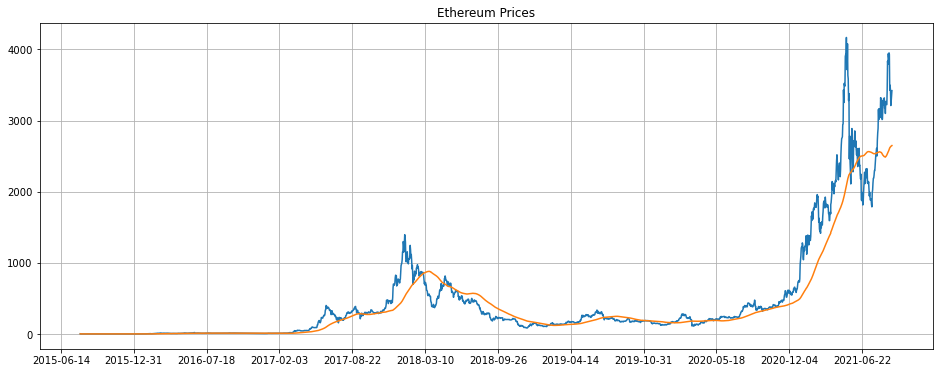

In [9]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(df.index, df.close)
ax.plot(df.index, df['100ma'])
ax.xaxis.set_major_locator(plt.MaxNLocator(15)) # reduce number of x-labels
plt.title('Ethereum Prices')
plt.grid()
plt.show()

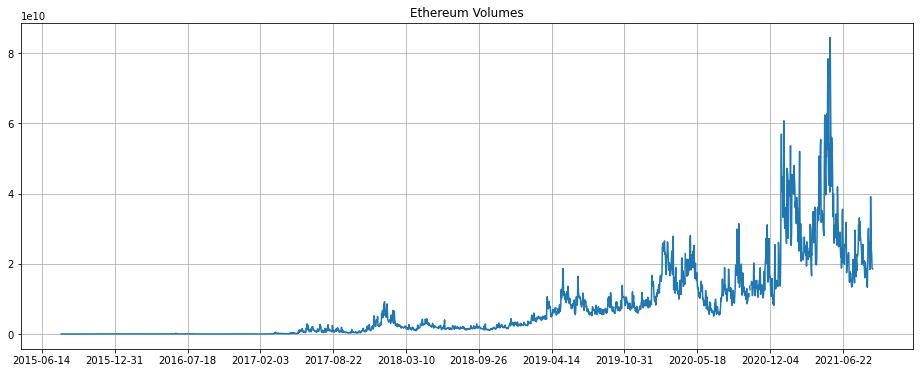

In [10]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(df.index, df.volume)
ax.xaxis.set_major_locator(plt.MaxNLocator(15)) # reduce number of x-labels
plt.title('Ethereum Volumes')
plt.grid()
plt.show()

# Market Cap

In [11]:
df['Total Traded'] = df['open']*df['volume']

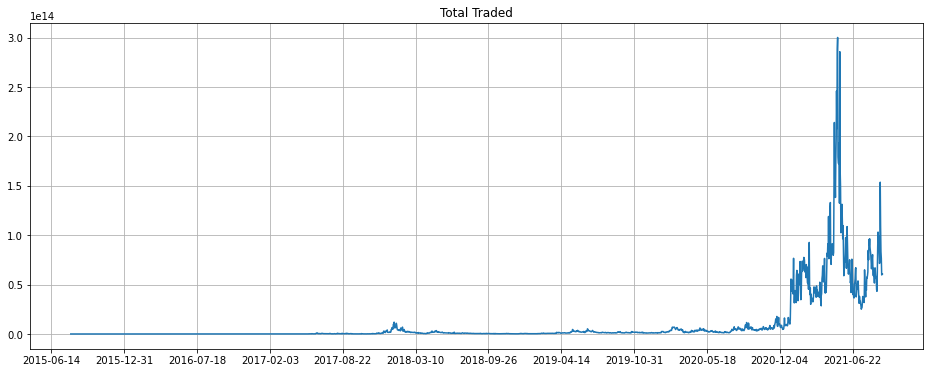

In [12]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(df.index, df['Total Traded'])
ax.xaxis.set_major_locator(plt.MaxNLocator(15)) # reduce number of x-labels
plt.title('Total Traded')
plt.grid()
plt.show()

We notice a **huge spike** in Ethereum market cap somewhere in 2021 let's investigate more :

In [13]:
df.index[df['Total Traded'].argmax()]

Timestamp('2021-05-12 00:00:00')

After a quick web search we found out that around 13th March, Ethereum spiked due to the rise of NFTs and DeFi applications to quote from the article : 
> Ethereum’s growth is attributed to an increasing number of developers building **decentralized finance** (DeFi) applications on the Ethereum blockchain platform. The rise of **non-fungible tokens** (NFT) also increases demand for Ethereum.
> Lastly, continued institutional interest in treating crypto like any other security also helps ETH. Coinbase is the new NYSE. ETH is No. 2 on Coinbase after Bitcoin.
> Seeing how the DeFi and NFT movements are directly connected to Ethereum, their increased activity has been the main driver for ETH prices in 2021, says Andrew Moss, GSR Capital’s managing director. “Users need ETH to interact with these technologies, so the more people who are involved with these communities and protocols, the higher the value of ETH goes,” he says.

* Source : https://www.forbes.com/sites/kenrapoza/2021/05/16/ethereum-faces-weekend-rout-but-some-see-eth-doubling-from-here/?sh=6845bee93817

We are going to plot a candlestick plot for Ethereum prices from April 2021

<ipython-input-23-7fa3e646448b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ohlc['date'] = ohlc.index


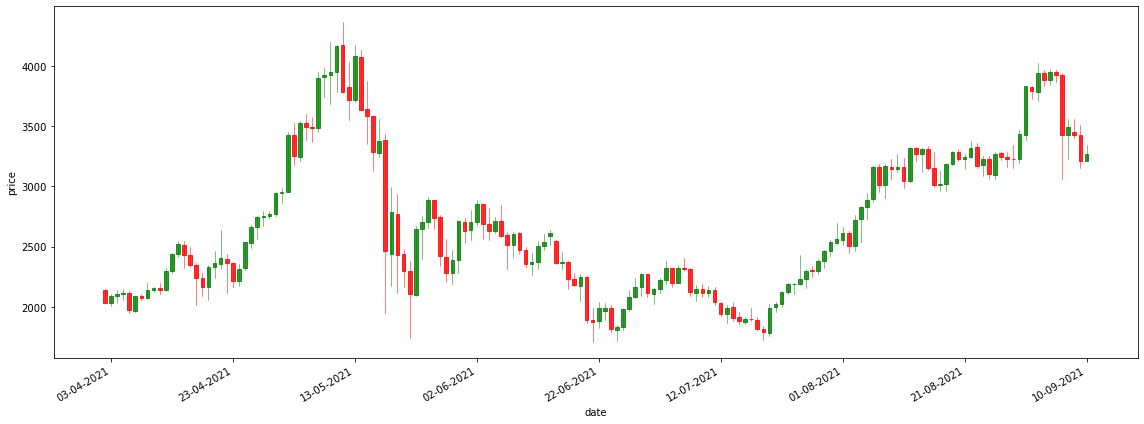

In [23]:
ohlc = df[(df.index > '2021-04-01') & (df.index <= '2021-09-10')]
ohlc['date'] = ohlc.index
ohlc = ohlc.loc[:, ['date','open', 'high', 'low', 'close']]
ohlc['date'] = pd.to_datetime(ohlc['date'])
ohlc['date'] = ohlc['date'].apply(mpl_dates.date2num)
ohlc = ohlc.astype(float)
fig, ax = plt.subplots(figsize = (16,6))
candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='green', colordown='red', alpha=0.8)
ax.set_xlabel('date')
ax.set_ylabel('price')
date_format = mpl_dates.DateFormatter('%d-%m-%Y')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

fig.tight_layout()

plt.show()

# Daily Percentage Change

The simple daily percentage change in closing price (without dividends and other factors) is the percentage change in the value of a stock over a single day of trading. It is defined by the following formula:

$$r_{t}=\frac{p_{t}}{p_{t-1}}-1$$

It's really useful as it indicates how **volatile** the currency is

In [24]:
df["returns"] = (df["close"]/df["close"].shift(1)) - 1

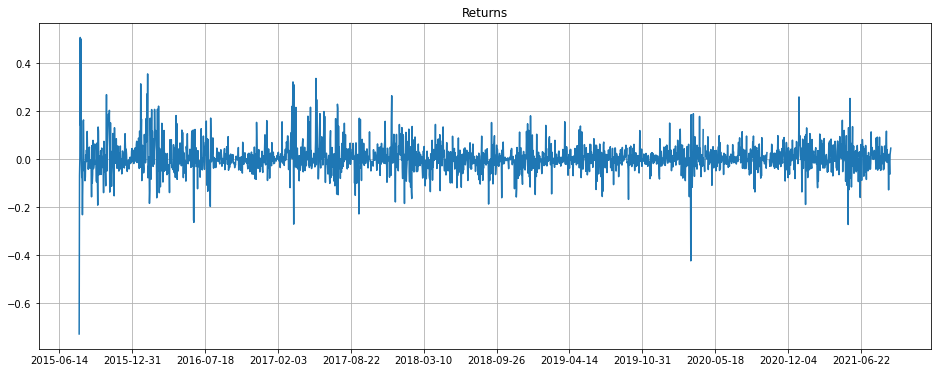

In [25]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(df.index, df['returns'])
ax.xaxis.set_major_locator(plt.MaxNLocator(15)) # reduce number of x-labels
plt.title('Returns')
plt.grid()
plt.show()

<AxesSubplot:>

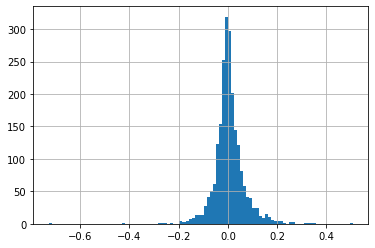

In [26]:
df["returns"].hist(bins=100)

In [27]:
df["returns"].describe()

count    2221.000000
mean        0.005318
std         0.064496
min        -0.728250
25%        -0.022891
50%         0.000787
75%         0.029767
max         0.507323
Name: returns, dtype: float64

<AxesSubplot:>

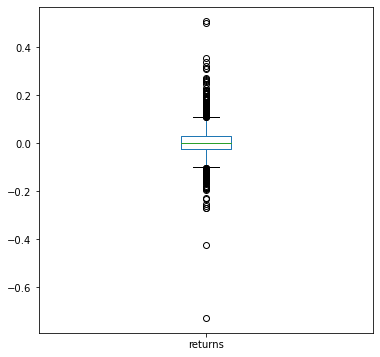

In [28]:
df["returns"].plot(kind = "box", figsize = (6,6))

# Cumulative Return

A cumulative return on an investment is the aggregate amount that the investment has gained or lost over time, independent of the amount of time involved. The cumulative return is expressed as a percentage, and it is the raw mathematical return of the following calculation: 

$$i_{t}=\left(1+r_{t}\right) i_{t-1}$$

In [29]:
df["Cumulative Return"] = (1 + df["returns"]).cumprod()

In [30]:
df

,open,high,low,close,volume,100ma,Total Traded,returns,Cumulative Return
2015-08-06,2.831620,3.536610,2.521120,2.772120,1.643290e+05,2.772120,4.653173e+05,NaN,NaN
2015-08-07,2.793760,2.798810,0.714725,0.753325,6.741880e+05,1.762722,1.883520e+06,-0.728250,0.271750
2015-08-08,0.706136,0.879810,0.629191,0.701897,5.321700e+05,1.409114,3.757844e+05,-0.068268,0.253199
2015-08-09,0.713989,0.729854,0.636546,0.708448,4.052830e+05,1.233948,2.893676e+05,0.009333,0.255562
2015-08-10,0.708087,1.131410,0.663235,1.067860,1.463100e+06,1.200730,1.036002e+06,0.507323,0.385214
...,...,...,...,...,...,...,...,...,...
2021-09-07,3428.378174,3559.121338,3224.764893,3497.315186,3.173843e+10,2624.456797,1.088113e+14,0.020698,1088.286818
2021-09-08,3452.548340,3562.992676,3400.517090,3427.340088,2.411806e+10,2632.395015,8.326875e+13,-0.020008,1066.512122
2021-09-09,3425.564941,3512.571289,3157.059082,3211.505859,2.235597e+10,2637.448823,7.658184e+13,-0.062974,999.349303
2021-09-10,3209.030518,3346.526367,3208.961914,3270.278076,1.862712e+10,2641.600339,5.977501e+13,0.018301,1017.637912


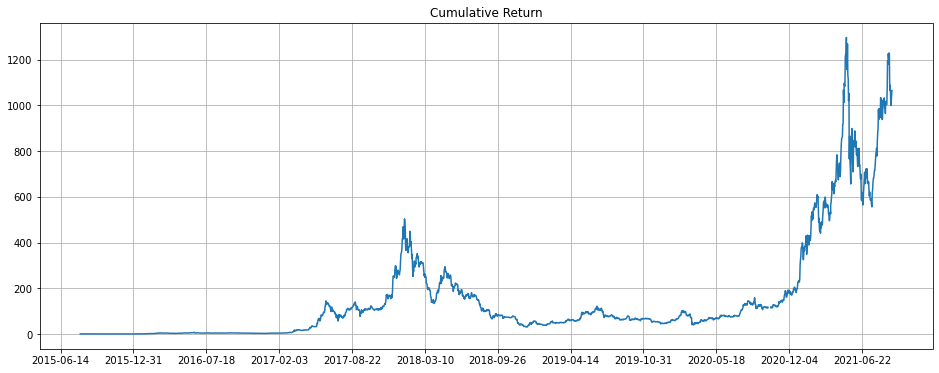

In [31]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(df.index, df['Cumulative Return'])
ax.xaxis.set_major_locator(plt.MaxNLocator(15)) # reduce number of x-labels
plt.title('Cumulative Return')
plt.grid()
plt.show()

In [34]:
df.iloc[df['Cumulative Return'].argmax()]

open                 3.948272e+03
high                 4.178209e+03
low                  3.783889e+03
close                4.168701e+03
volume               5.267974e+10
100ma                2.094011e+03
Total Traded         2.079939e+14
returns              5.475484e-02
Cumulative Return    1.297207e+03
Name: 2021-05-10 00:00:00, dtype: float64

## Conclusion : 

We see that **May 2021** was the best time to sell if you want the most profit after that the value of Ethereum kinda went down, also **2017** was also a good time for Ethereum, if you have been investing since the start you would have gained **730%** in returns and if you sold at the peak you would have gained **1300%**, We also notice that Ethereum is highly **volatile** so one should be very cautious while investing.

Cryptocurrency in general are quite volatile this is the case for many reasons and as I'm a financial expert I'm gonna quote an article i searched for :
>Many of the reasons for price volatility in mainstream markets hold true for cryptocurrencies as well. News developments and speculation are responsible for fueling price swings in crypto and mainstream markets alike. But their effect is exaggerated in crypto markets as they have less liquidity than traditional financial markets — a result of crypto markets lacking a robust ecosystem of institutional investors and large trading firms. Heightened volatility and a lack of liquidity can create a dangerous combination because both feed off of each other. Other than bitcoin, most other cryptocurrencies also lack established and widely adopted derivatives markets. Under the sway of day traders and speculators, crypto prices sometimes exhibit healthy volatility of the type we see in mainstream markets.

* Source : https://www.gemini.com/cryptopedia/volatility-index-crypto-market-price

But I still think that Ethereum still has a bright future especially after the recent developments of **Ethereum 2.0**

### Why can't we use machine learning to predict prices ?

There is far more going on in the stock market data than can be captured simply by looking at a univariate series of historical values. The stock prices are not the result of a couple of underlying causal factors, but a rather a multitude of contributions as well as a good dose of human irrationality. Indeed it has been posited that stock data is almost random.

There is a great notebook that explains why predicting stock prices is very hard :
https://www.kaggle.com/carlmcbrideellis/lstm-time-series-stock-price-prediction-fail